In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [75]:
def plot_train_log(file_path, loss_or_acc):
    '''
    Plot learning curve
    ---------
    Arguments:
    file_path   - the save path of learning log, should be a csv file
    loss_or_acc - bool, 'loss' or 'acc', choose to plot loss curve or acc curve
    '''
    assert file_path[-3:] == 'csv', f"Input file should be a csv file, got '{file_path[-3:]}'"
    
    train_log = pd.read_csv(file_path)
    train_loss = train_log['Train Loss']
    train_acc = train_log['Train Acc']
    if loss_or_acc == 'loss':
        plt.plot(train_loss)
    elif loss_or_acc == 'acc':
        plt.plot(train_acc)
    
    
def plot_test_res(file_path):
    '''
    Plot test set result
    ----------
    Arguments:
    file_path    - the save path of test set result, should be a npy file
    '''
    assert file_path[-3:] == 'npy', f"Input file should be a npy file, got '{file_path[-3:]}'"
    
    res = np.load(file_path)
    plt.plot(res, 'o--')

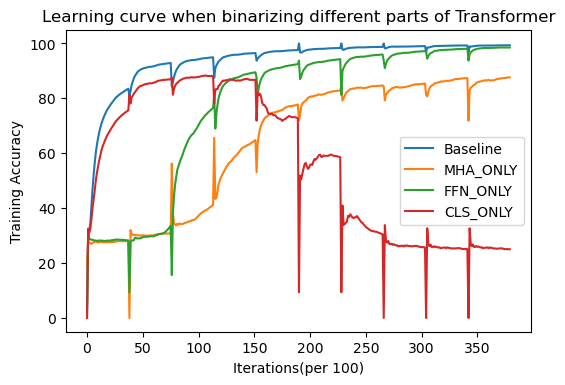

In [78]:
exps = ['transformer_baseline', 
        'transformer_binarization_MHA_ONLY', 
        'transformer_binarization_FFN_ONLY',
        'transformer_binarization_CLS_ONLY']
legends = ['Baseline', 'MHA_ONLY', 'FFN_ONLY', 'CLS_ONLY']

plt.figure(dpi=100)
for exp in exps:
    file_path = f'./res/{exp}_log.csv'
    plot_train_log(file_path, 'acc')
    
plt.legend(legends)
plt.xlabel('Iterations(per 100)')
plt.ylabel('Training Accuracy')
plt.title('Learning curve when binarizing different parts of Transformer')
plt.savefig('./figures/learning_curve_binarization.png')

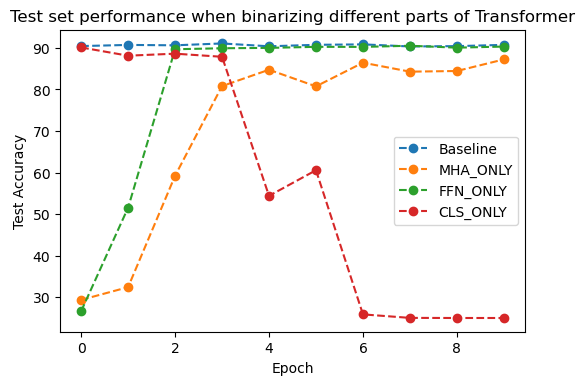

In [80]:
plt.figure(dpi=100)
for exp in exps:
    file_path = f'./res/{exp}_test.npy'
    plot_test_res(file_path)
plt.legend(legends)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test set performance when binarizing different parts of Transformer')
plt.savefig('./figures/test_perf_binarization.png')